# 5.逻辑回归
## 调包

In [22]:
import numpy as np
import matplotlib.pyplot as plt

## 5.1.训练算法：使用梯度上升找到最佳参数
### 5.1.1.读取数据

In [3]:
def loadDataSet():
    """
    读取数据集
    参数：
        无
    返回：
        dataMat -- 数据矩阵
        labelMat -- 标签矩阵
    """
    #初始化两个矩阵
    dataMat = []; labelMat = []
    #打开测试文件
    fr = open('testSet.txt')
    #读取每一行
    for line in fr.readlines():
        #分割
        lineArr = line.strip().split()
        #添加到数据矩阵
        dataMat.append([1.0, np.float(lineArr[0]), np.float(lineArr[1])])
        #添加到标签矩阵
        labelMat.append(np.int(lineArr[2]))
    return dataMat,labelMat

### 5.1.2.sigmoid函数

In [4]:
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

### 5.1.3.梯度上升函数

In [20]:
def gradAscent(dataMatIn, classLabels):
    """
    梯度上升函数
    参数：
        dataMatIn -- 输入数据矩阵
        classLabels -- 类标签
    返回：
        weights -- 权重参数
    """
    #转化为np矩阵
    dataMatrix = np.array(dataMatIn)
    labelMat = np.array(classLabels).reshape(-1, 1)
    #得到数据矩阵维度，分别为样本数和特征数
    m,n = dataMatrix.shape
    #学习率
    alpha = 0.001
    #最大迭代次数
    maxCycles = 500
    #初始化参数
    weights = np.ones((n,1))
    #迭代
    for k in range(maxCycles):
        #预测值
        h = sigmoid(np.dot(dataMatrix,weights))
        #误差
        error = (labelMat - h)
        #更新参数
        weights = weights + alpha * np.dot(dataMatrix.T, error)
    return weights

测试

In [26]:
dataArr, labelMat = loadDataSet()
weights = gradAscent(dataArr, labelMat)
print("学习到的权重为{}".format(weights))

学习到的权重为[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


## 5.2.分析数据：画出决策边界 

In [36]:
def plotBestFit(weights):
    """
    画出决策边界
    参数：
        weights -- 权重参数
    返回：
        无 -- 直接画图
    """
    #读取数据
    dataMat,labelMat=loadDataSet()
    #数据矩阵
    dataArr = np.array(dataMat)
    #得到数据点的个数
    n = dataArr.shape[0]
    #不同类别的数据的横纵坐标记录列表
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    #遍历数据点
    for i in range(n):
        if np.int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    #新建画布
    fig = plt.figure()
    #新建轴
    ax = fig.add_subplot(111)
    #绘制类型1的散点图
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    #绘制类型0的散点图
    ax.scatter(xcord2, ycord2, s=30, c='green')
    #绘制决策边界
    #x取值范围
    x = np.arange(-3.0, 3.0, 0.1)
    #按照学习的权重求y=-(w0+w1*x)/w2
    y = (-weights[0]-weights[1]*x)/weights[2]
    #绘制决策直线
    ax.plot(x, y)
    #轴标记文本
    plt.xlabel('X1'); plt.ylabel('X2')
    #显示
    plt.show()

测试

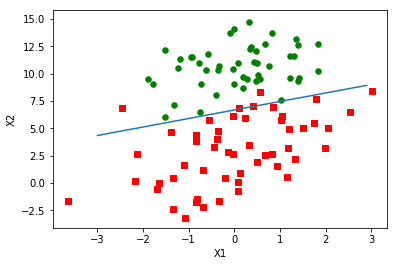

In [37]:
plotBestFit(weights)

### 5.2.1.随机梯度上升

In [55]:
def stocGradAscent0(dataMatrix, classLabels):
    """
    随机梯度上升
    参数：
        dataMatrix -- 数据矩阵
        classLabels -- 类别标签
    返回：
        weights -- 训练后的权重参数
    """
    #确保标签向量为列向量
    classLabels = np.array(classLabels).reshape(-1, 1)
    #求矩阵维度
    m,n = np.shape(dataMatrix)
    #学习率
    alpha = 0.01
    #初始化为全1
    weights = np.ones((n, 1))
    #遍历每个数据
    for i in range(m):
        h = sigmoid(np.dot(dataMatrix[i:i+1, :], weights))
        error = classLabels[i] - h
        weights = weights + alpha * dataMatrix[i:i+1, :].T * error
    return weights

测试

[[ 1.01702007]
 [ 0.85914348]
 [-0.36579921]]


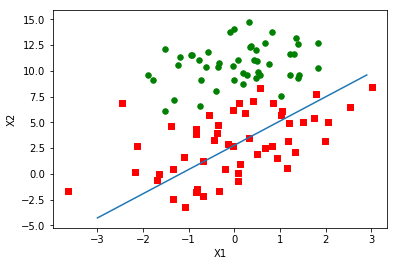

In [56]:
dataArr, labelMat = loadDataSet()
weights0 = stocGradAscent0(np.array(dataArr), labelMat)
print(weights0)
plotBestFit(weights0)

### 5.2.2.改进的随机梯度上升算法

In [77]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    """
    改进的随机梯度上升算法
    参数：
        dataMatrix -- 数据矩阵
        classLabels -- 标签
        numIter -- 迭代次数
    返回：
        weights -- 训练后的权重参数
    """
    classLabels = np.array(classLabels).reshape(-1, 1)
    m,n = np.shape(dataMatrix)
    weights = np.ones((n, 1))
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            #学习率随迭代的进行而变化
            alpha = 4/(1.0+j+i)+0.0001
            #随机的参数
            randIndex = np.int(np.random.uniform(0,len(dataIndex)))
            h = sigmoid(np.dot(dataMatrix[randIndex:randIndex+1, :], weights))
            error = classLabels[randIndex:randIndex+1, 0] - h
            weights = weights + alpha * error * dataMatrix[randIndex:randIndex+1, :].T
            del(dataIndex[randIndex])
    return weights

测试

[[ 13.21735665]
 [  1.07914686]
 [ -1.91868707]]


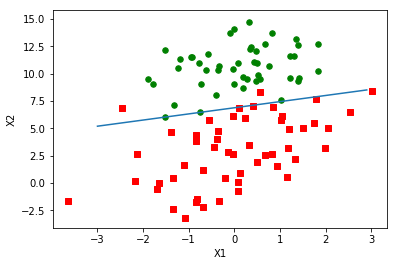

In [79]:
dataArr, labelMat = loadDataSet()
weights1 = stocGradAscent1(np.array(dataArr), labelMat)
print(weights1)
plotBestFit(weights1)

## 5.3.示例：从疝气病症预测病马的死亡率 
### 5.3.1.用 Logistic回归进行分类

In [80]:
def classifyVector(inX, weights):
    """
    对输入的向量做预测
    参数：
        inX -- 输入向量
        weights -- 权重参数
    """
    prob = sigmoid(np.sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

In [81]:
def colicTest():
    """
    实例的测试函数
    参数：
        无
    返回：
        errorRate -- 测试得到的错误率
    """
    #读取训练集和测试集的数据
    frTrain = open('horseColicTraining.txt'); frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(np.float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(np.float(currLine[21]))
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(np.float(currLine[i]))
        if np.int(classifyVector(np.array(lineArr), trainWeights))!= np.int(currLine[21]):
            errorCount += 1
    errorRate = (np.float(errorCount)/numTestVec)
    print("the error rate of this test is:{}".format(errorRate))
    return errorRate

In [82]:
def multiTest():
    """
    多次调用测试函数，并取平均
    参数：
        无
    返回：
        无 -- 直接打印结果
    """
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after {} iterations the average error rate is: {}".format(numTests, errorSum/np.float(numTests)))

测试

In [83]:
multiTest()

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


the error rate of this test is:0.29850746268656714
the error rate of this test is:0.29850746268656714
the error rate of this test is:0.29850746268656714
the error rate of this test is:0.29850746268656714
the error rate of this test is:0.29850746268656714
the error rate of this test is:0.29850746268656714
the error rate of this test is:0.29850746268656714
the error rate of this test is:0.29850746268656714
the error rate of this test is:0.29850746268656714
the error rate of this test is:0.29850746268656714
after 10 iterations the average error rate is: 0.29850746268656714
